In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
%matplotlib inline

## Start by importing the module pydtfe

In [2]:
from pydtfe import map_dtfe2d

## Then create a fake distribution of points

In [3]:
nb_points=1000
sample_test=np.random.randn(nb_points,2)
x,y=sample_test[:,0],sample_test[:,1]

## One can look at the distribution you've just made

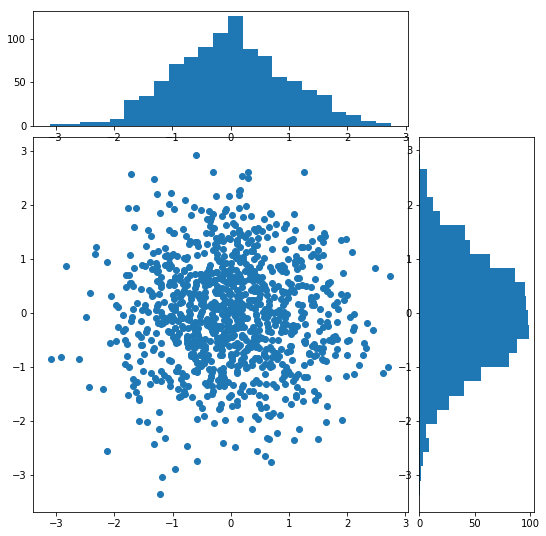

In [4]:
plt.figure(1, figsize=(8, 8))
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
axScatter.scatter(x, y)
n1=axHistx.hist(x,bins='auto')
n2=axHisty.hist(y,bins='auto',orientation='horizontal')

## Define a size for your map...

In [5]:
size=1000

## ... and run the function map_dtfe

In [6]:
grid=map_dtfe2d(x,y,size)

## You can smooth your map to avoid geometrical effects of Delaunay tesselation

In [7]:
std_in_pixel=0.01*size # here a standard deviation in pixels
smooth_grid=gaussian_filter(grid,std_in_pixel)

## And now you can look at your density maps

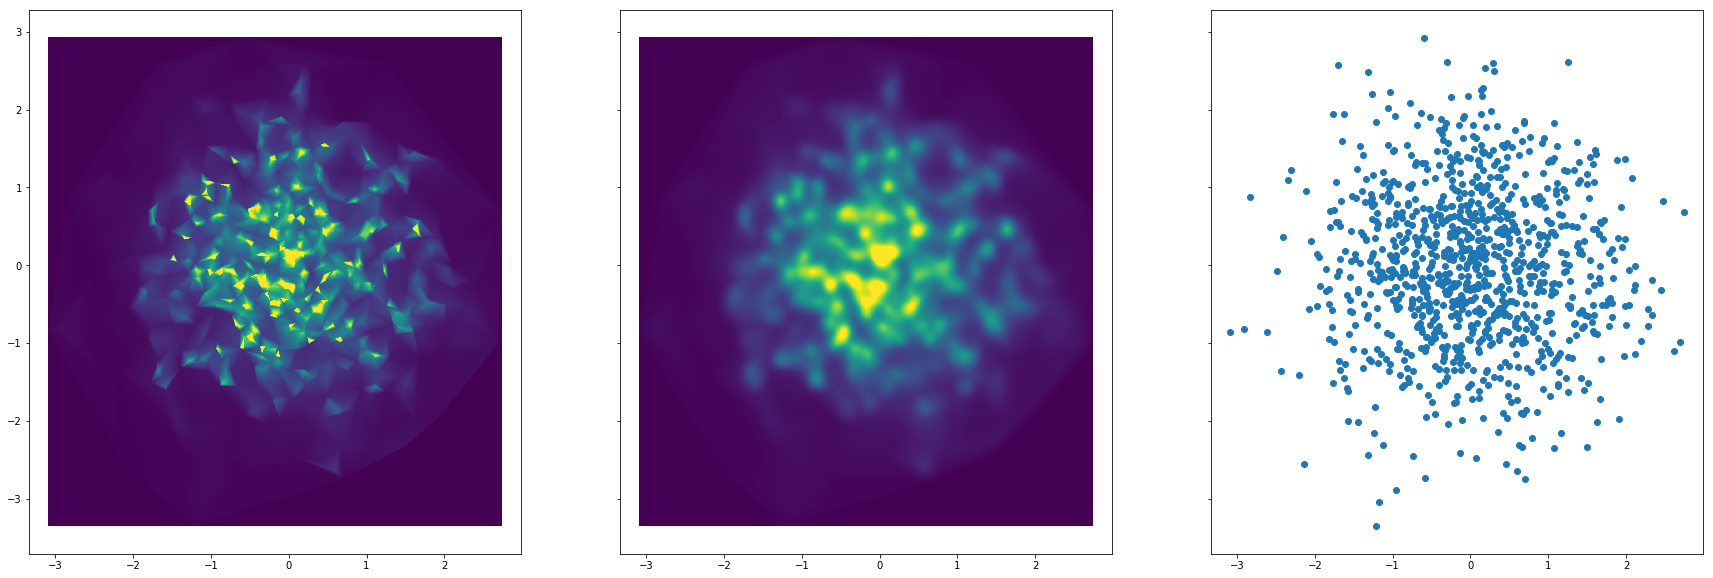

In [8]:
fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,sharex=True,sharey=True,figsize=(30,10))
ax1.imshow(grid,vmin=0,vmax=5*np.std(grid),interpolation='None',origin='lower',extent=[x.min(),x.max(),y.min(),y.max()])
ax2.imshow(smooth_grid,vmin=0,vmax=5*np.std(smooth_grid),interpolation='None',origin='lower',extent=[x.min(),x.max(),y.min(),y.max()])
ax3.scatter(x,y)

## Try now with more complicated distributions !